In [1]:
import numpy as np
import pandas as pd

## Attention calculation - 1 (Bahdauni)

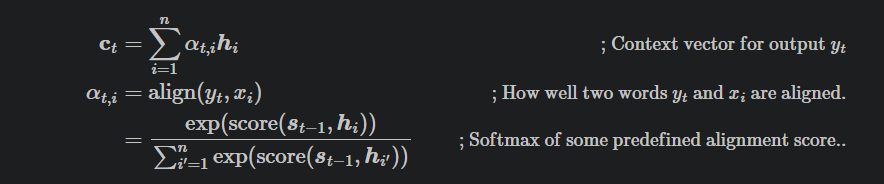



In [2]:
MAX_SENT_LEN = 512
ENC_EMB_DIM = 64
DEC_EMB_DIM = 64
ENC_HID_DIM = 128
DEC_HID_DIM = 128
ATTN_DIM = 32
NUM_LAYERS = 2
NUM_DIR = 2 # bi-directional rnn

Calculating for one example first.

In [6]:
# Encoder outputs
# outputs = [src sent len, batch size, hid dim * num directions] last layer output of gru
# hidden = [n layers * num directions, batch size, hid dim] hidden state output of last token pass through gru

# ignore batch size for trial now
outputs = np.random.randn(MAX_SENT_LEN, NUM_DIR * ENC_HID_DIM)
hidden = np.random.randn(NUM_LAYERS * NUM_DIR, ENC_HID_DIM)

print(outputs.shape, hidden.shape)

(512, 256) (4, 128)


In [12]:
# concatenating first 2 vector which represent the forward and backward hidden states of the last rnn layer
hidden_last = np.concatenate((hidden[-2,:], hidden[-1,:]), axis =0)
hidden_last.shape

(256,)

In [13]:
hidden_last[:10]

array([ 0.10361327, -0.73707737, -0.38701246, -0.48684329, -0.24052959,
       -0.61700262, -0.29022468, -0.46865271, -1.37472278,  0.8685496 ])

In [14]:
hidden_last = np.expand_dims(hidden_last, axis=0)

# hidden_last -> concatenation of last layers forward and backward vectors of rnn
# output -> sentence len, concatenation of last layers forward and backward vectors of rnn
hidden_last.shape, outputs.shape

((1, 256), (512, 256))

In [15]:
# repeat hidden sentence last time
hidden_last_repeat = np.repeat(hidden_last, repeats=MAX_SENT_LEN, axis=0)
hidden_last_repeat.shape

(512, 256)

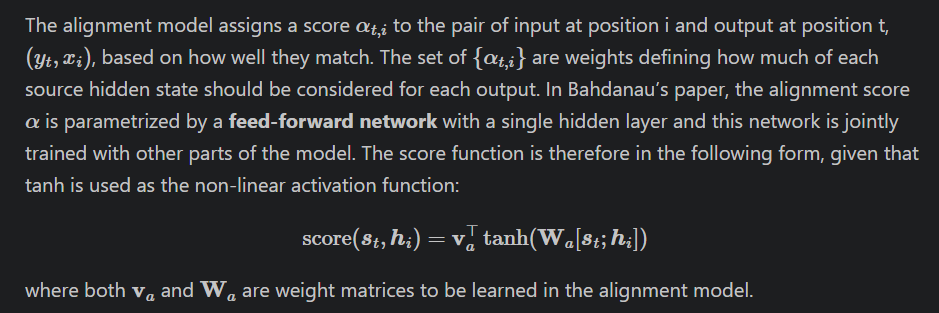


In [16]:
inp = np.concatenate([outputs, hidden_last_repeat], axis=1)
inp.shape

(512, 512)

In [17]:

# applying a feed forward layer with tanh as activation function according to the paper
W1 = np.random.randn(ATTN_DIM, ENC_HID_DIM*2*2)
B1 = np.random.randn(ATTN_DIM, 1)

attn_score_vec = np.tanh(np.dot(W1, inp.T) + B1)
attn_score_vec.shape


(32, 512)

In [18]:
# parameter v is also learned
W2 = np.random.randn(1, ATTN_DIM)
B2 = np.random.randn(1, 1)

attn_score = np.dot(W2, attn_score_vec) + B2
attn_score.shape = (MAX_SENT_LEN)
attn_score.shape

(512,)

In [19]:
attn_score[:10]

array([ 3.03329624,  5.90996067,  0.64865263, 11.14748035,  2.52411702,
        4.51664094, -0.19667855, -0.99033534,  1.24747922,  5.59729899])

In [20]:
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = np.sum(e_z)
    return e_z / sum_e_z

In [21]:
score = softmax(attn_score)
score = np.expand_dims(score, axis=0)
score[:, :10]

array([[1.10368371e-05, 1.95958507e-04, 1.01673335e-06, 3.68799240e-02,
        6.63301386e-06, 4.86466623e-05, 4.36600676e-07, 1.97425678e-07,
        1.85043636e-06, 1.43343128e-04]])

In [26]:
weighted_sum = np.dot(score, outputs)
weighted_sum.shape

(1, 256)

## Attention 2 - Luong

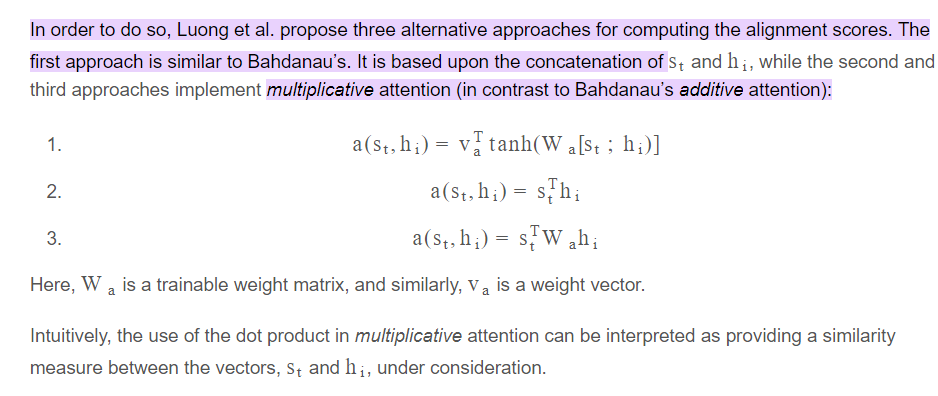

reference - https://stackoverflow.com/questions/50571991/implementing-luong-attention-in-pytorch

